<a href="https://colab.research.google.com/github/08vivek08/data-science/blob/main/5_Mulitple_Linear_Regression_Co2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.style as style
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-12-20 16:45:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2020-12-20 16:45:01 (2.77 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,8.5,6.7,9.9,196
1,2.4,4,9.6,7.7,11.2,221
2,1.5,4,5.9,5.8,6.0,136
3,3.5,6,11.1,9.1,12.7,255
4,3.5,6,10.6,8.7,12.1,244


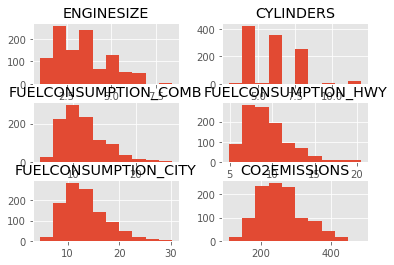

In [6]:
style.use('ggplot')
cdf.hist()
plt.show()

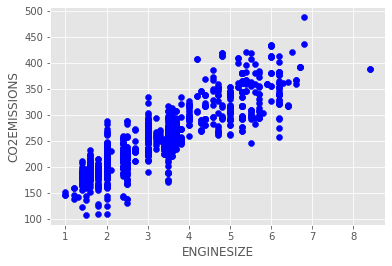

In [7]:
style.use('ggplot')
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

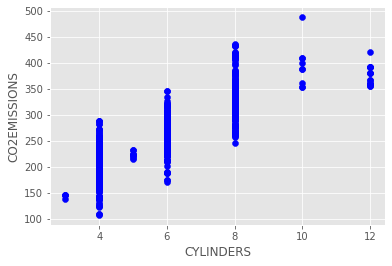

In [8]:
style.use('ggplot')
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

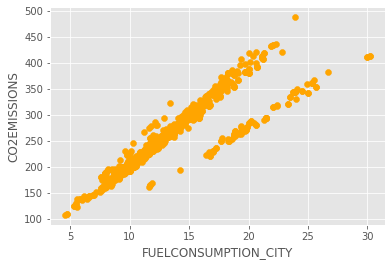

In [9]:
style.use('ggplot')
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS,color='orange')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

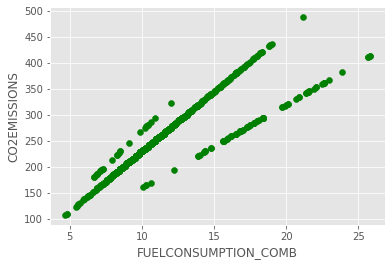

In [10]:
style.use('ggplot')
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

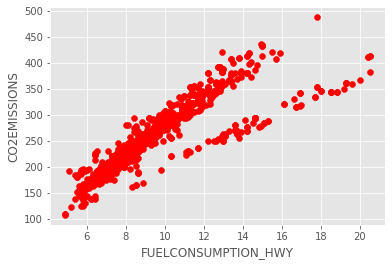

In [11]:
style.use('ggplot')
plt.scatter(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS,color='red')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [12]:
mask=np.random.rand(len(df))<0.8
train=cdf[mask]
test=cdf[~mask]

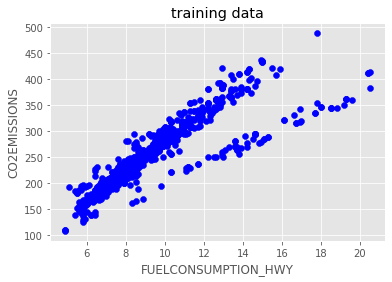

In [13]:
style.use('ggplot')
plt.scatter(train.FUELCONSUMPTION_HWY,train.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2EMISSIONS")
plt.title("training data")
plt.show()

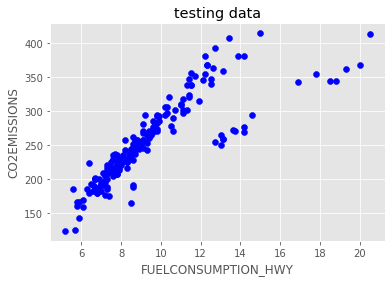

In [14]:
style.use('ggplot')
plt.scatter(test.FUELCONSUMPTION_HWY,test.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2EMISSIONS")
plt.title("testing data")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.



In [15]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['FUELCONSUMPTION_COMB','ENGINESIZE']]) 
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# The Coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ",regr.intercept_)

Coefficients:  [[ 9.84014762 19.63986692]]
Intercept:  [77.1241842]


In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [16]:
train_FUEL=np.asanyarray(train.FUELCONSUMPTION_COMB)
train_FUEL=train_FUEL.reshape(train_y.shape)
train_ENGINESIZE=np.asanyarray(train.ENGINESIZE)
train_ENGINESIZE=train_ENGINESIZE.reshape(train_y.shape)
train_y_hat=regr.predict(train_x)
print(train_ENGINESIZE.shape)
print(train_FUEL.shape)
print(train_y.shape)
print(train_y_hat.shape)
print(train_x.shape)

(874, 1)
(874, 1)
(874, 1)
(874, 1)
(874, 2)


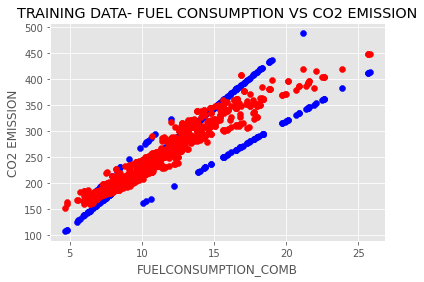

In [17]:
style.use('ggplot')
plt.scatter(train_FUEL,train_y,color='blue')
plt.scatter(train_FUEL,train_y_hat,color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 EMISSION")
plt.title("TRAINING DATA- FUEL CONSUMPTION VS CO2 EMISSION")
plt.show()

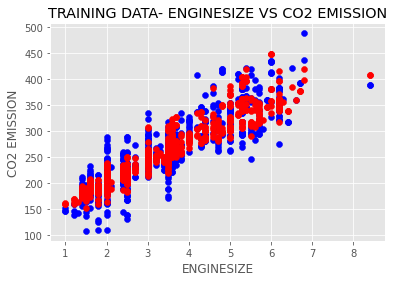

In [18]:
style.use('ggplot')
plt.scatter(train_ENGINESIZE,train_y,color='blue')
plt.scatter(train_ENGINESIZE,train_y_hat,color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2 EMISSION")
plt.title("TRAINING DATA- ENGINESIZE VS CO2 EMISSION")
plt.show()

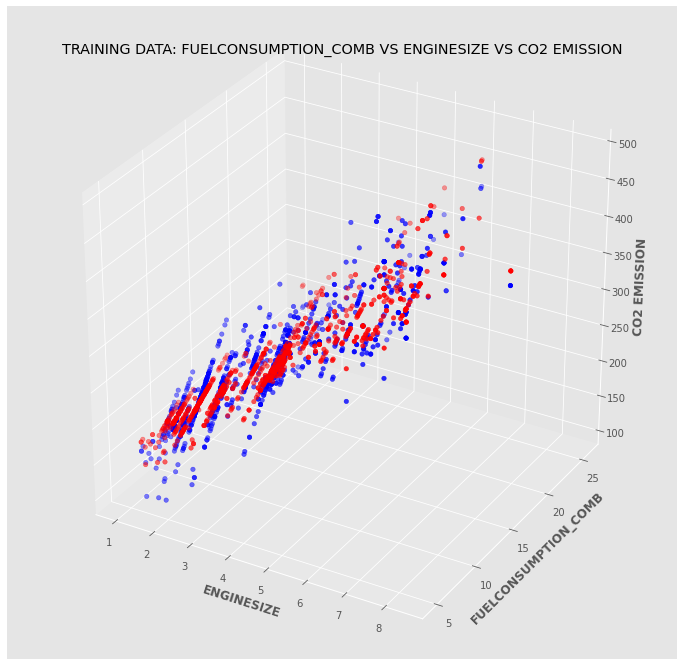

In [19]:
style.use('ggplot')
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
 
# Creating 3D plot
ax.scatter3D(train_ENGINESIZE, train_FUEL, train_y, color = "blue")
ax.scatter3D(train_ENGINESIZE, train_FUEL, train_y_hat, color = "red")
ax.set_ylabel('FUELCONSUMPTION_COMB', fontweight ='bold') 
ax.set_xlabel('ENGINESIZE', fontweight ='bold') 
ax.set_zlabel('CO2 EMISSION', fontweight ='bold')
ax.set_title("TRAINING DATA: FUELCONSUMPTION_COMB VS ENGINESIZE VS CO2 EMISSION")
plt.show()

<h2 id="evaluation">Evaluation</h2>

In [20]:
from sklearn.metrics import r2_score

test_y_hat=regr.predict(test[['FUELCONSUMPTION_COMB','ENGINESIZE']])
test_x=np.asanyarray(test[['FUELCONSUMPTION_COMB','ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" %np.mean((test_y_hat-test_y)**2))
print("Variance score: %.2f" %regr.score(test_x,test_y))
print("R2-score: %.2f" %r2_score(test_y_hat,test_y))

Residual sum of squares: 523.96
Variance score: 0.85
R2-score: 0.85


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

In [21]:
test_FUEL=np.asanyarray(test.FUELCONSUMPTION_COMB)
test_FUEL=test_FUEL.reshape(test_y.shape)
test_ENGINESIZE=np.asanyarray(test.ENGINESIZE)
test_ENGINESIZE=test_ENGINESIZE.reshape(test_y.shape)
print(test_ENGINESIZE.shape)
print(test_FUEL.shape)
print(test_y.shape)
print(test_y_hat.shape)
print(test_x.shape)

(193, 1)
(193, 1)
(193, 1)
(193, 1)
(193, 2)


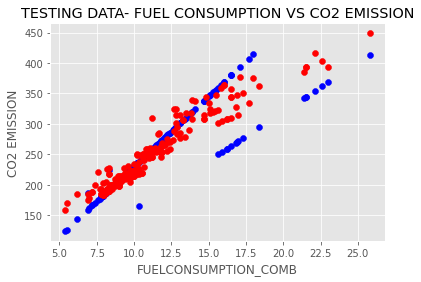

In [22]:
style.use('ggplot')
plt.scatter(test_FUEL,test_y,color='blue')
plt.scatter(test_FUEL,test_y_hat,color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 EMISSION")
plt.title("TESTING DATA- FUEL CONSUMPTION VS CO2 EMISSION")
plt.show()

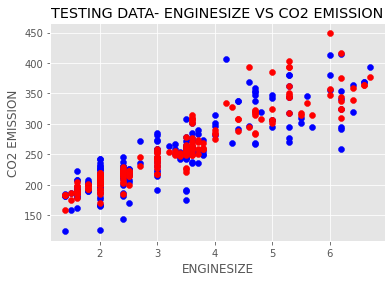

In [23]:
style.use('ggplot')
plt.scatter(test_ENGINESIZE,test_y,color='blue')
plt.scatter(test_ENGINESIZE,test_y_hat,color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2 EMISSION")
plt.title("TESTING DATA- ENGINESIZE VS CO2 EMISSION")
plt.show()

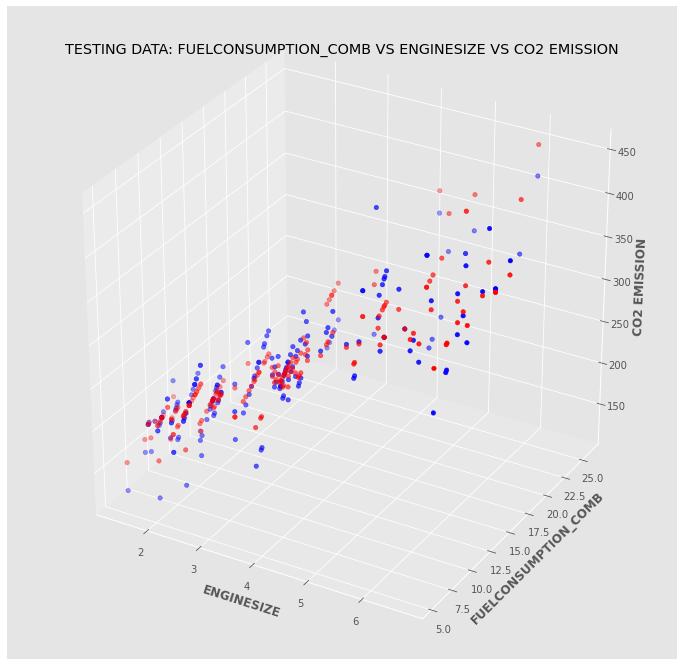

In [24]:
style.use('ggplot')
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
 
# Creating 3D plot
ax.scatter3D(test_ENGINESIZE, test_FUEL, test_y, color = "blue")
ax.scatter3D(test_ENGINESIZE, test_FUEL, test_y_hat, color = "red")
ax.set_ylabel('FUELCONSUMPTION_COMB', fontweight ='bold') 
ax.set_xlabel('ENGINESIZE', fontweight ='bold') 
ax.set_zlabel('CO2 EMISSION', fontweight ='bold')
ax.set_title("TESTING DATA: FUELCONSUMPTION_COMB VS ENGINESIZE VS CO2 EMISSION")
plt.show()